# Final Project : Cyber Threat Type Prediction for Efficient Cybersecurity Budget Allocation

---

## Cyber Threat Type Prediction for Efficient Cybersecurity Budget Allocation
**Introduction** <br>
In an increasingly digital and interconnected world, cybersecurity has become a critical priority for organizations of all sizes. For mid-sized enterprises with limited financial resources, allocating budgets effectively to mitigate cyber threats is a daunting challenge. Attack types such as **Distributed Denial of Service (DDoS)**, **Man-in-the-Middle (MitM)**, and **Data Exfiltration** pose significant risks, each requiring unique mitigation strategies and costs.

The ***"Cyber Threat Type Prediction for Efficient Cybersecurity Budget Allocation"*** project addresses this challenge by leveraging predictive analytics to identify and prioritize cyber threats. The project utilizes historical attack data and machine learning models to classify attack types based on their frequency and impact. This data-driven approach provides actionable insights to guide cybersecurity budget allocation, ensuring resources are focused on the most critical threats.

**Key objectives of the project include:** <br>
**Threat Classification:** Predicting the type of cyber threat based on network traffic patterns. <br>
**Priority-Based Allocation:** Identifying high-risk, high-cost threats for resource prioritization. <br>
**Cost Optimization:** Ensuring the limited cybersecurity budget is distributed efficiently without compromising network security. <br>
By integrating predictive modeling into cybersecurity planning, this project empowers organizations to make informed, strategic decisions. The result is a proactive defense framework that enhances security while optimizing financial expenditure, ultimately enabling enterprises to thrive in a challenging digital landscape.

---

## Problem Statement:


Efficient Allocation of Limited Cybersecurity Budgets in the Face of Diverse and Evolving Cyber Threats <br>

Mid-sized enterprises are increasingly adopting IoT-enabled systems to drive growth and expand their operations. In this digital transformation exposes them to a wide range of cyber threats, including Distributed Denial of Service (DDoS), Man-in-the-Middle (MitM), and Data Exfiltration attacks. Each attack type has unique characteristics, varying in frequency, impact, and associated mitigation costs.

For growing organizations with limited financial resources, allocating cybersecurity budgets effectively is a complex challenge. A generalized approach to cybersecurity spending often results in:

Overinvestment in low-priority threats, wasting valuable resources. <br>
Underinvestment in high-impact threats, leaving critical vulnerabilities exposed. <br>
Inefficient Resource Allocation, leading to increased risks of breaches, downtime, and financial loss. <br>

 -- 1.Predict the types of cyber threats most likely to occur. <br>
 -- Quantify their potential impact and cost implications. <br>
 -- Enable informed, priority-based budget allocation to enhance overall security posture. <br>
**Goal: "Our goal is to empower mid-sized enterprises to allocate limited cybersecurity budgets efficiently by leveraging predictive analytics to classify cyber threats, prioritize risks, and optimize resource distribution, ensuring robust protection against high-impact attacks while maintaining cost-effectiveness."**

---

### Areas of Impact
**1.Cybersecurity and Information Technology** <br>
-- Enhances threat detection and response capabilities. <br>
-- Helps cybersecurity teams prioritize threats and allocate resources efficiently. <br>
-- Supports the development of advanced, automated cybersecurity frameworks. <br>
**2.Financial Management and Budget Planning**<br>
-- Assists CFOs and financial planners in distributing limited budgets strategically. <br>
-- Financial balances <br>
**3.IoT and Connected Devices**<br>
-- Secures critical infrastructure in industries relying heavily on IoT, such as manufacturing, healthcare, and logistics. <br>
**4.Data Protection and Compliance.** <br>
-- Supports adherence to regulatory requirements (e.g., GDPR, HIPAA, CCPA).<br>
-- Reduces the risk of data breaches and associated penalties.<br>
-- Strengthens auditing and reporting mechanisms for compliance purposes.<br>
**5.Risk Management**
-- Helps risk management teams evaluate and mitigate the financial and operational impact of cyberattacks.<br>
-- Prioritizes defense strategies based on attack likelihood and potential damage.<br>
**6.Enterprise Operations and Strategy** <br>
-- Aligns cybersecurity initiatives with broader business goals.<br>
-- Provides leadership with actionable insights to balance growth with security needs.<br>
-- Supports strategic planning for long-term organizational resilience.<br>
**7.Small and Medium Enterprises (SMEs)** <br>
-- Tailored for organizations with limited budgets and resources.<br>
-- Provides cost-effective solutions to manage increasing cybersecurity threats.<br>
-- Empowers SMEs to compete in a digital-first economy securely.<br>
**8.Cloud Computing and Digital Infrastructure** <br>
-- Protects cloud-based systems from common threats like DDoS and data exfiltration.<br>
-- Ensures secure integration of cloud services with existing IT infrastructure.<br>
**9.Consulting and Advisory Services** <br>
-- Enables cybersecurity consultants to provide targeted recommendations to clients.<br>
-- Adds value by offering predictive models and cost allocation strategies.<br>
**10.Critical Infrastructure Industries** <br>
-- **Healthcare:** Protects patient data and prevents ransomware attacks.<br>
-- **Energy:** Secures operational technology (OT) systems and power grids.<br>
-- **Banking and Finance:** Safeguards sensitive financial transactions and customer information.<br>

---

## Import Libraries:
This section imports the required Python libraries for the project.

In [1]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os


# Import warnings to manage warning messages
import warnings
warnings.filterwarnings("ignore")


---

## MLflow Setup for Experiment Tracking
This section sets up MLflow, a platform for managing the machine learning lifecycle, including experiment tracking, reproducibility, and model deployment.

In [3]:
# MLflow Setup
# For JSON handling
import json

# Set up MLFlow server authentication
os.environ['MLFLOW_TRACKING_USERNAME'] = 'abhijithn'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '926514'
mlflow.set_tracking_uri("http://131.247.92.12:5012")
mlflow.set_experiment("Cyber_Attack_Analysis")

<Experiment: artifact_location='mlflow-artifacts:/2', creation_time=1731774001430, experiment_id='2', last_update_time=1731774001430, lifecycle_stage='active', name='Cyber_Attack_Analysis', tags={}>

---
## Loading the dataset 

In [4]:
# Load the Dataset
data_path = 'C:/Users/Abhijith Nallana/Downloads/RT_IOT2022.unknown'
data = pd.read_csv(data_path)


---
## Exploratory Data Analysis (EDA)
a.Specify the target column and numerical features <br>
b.Generate descriptive visualisations <br>

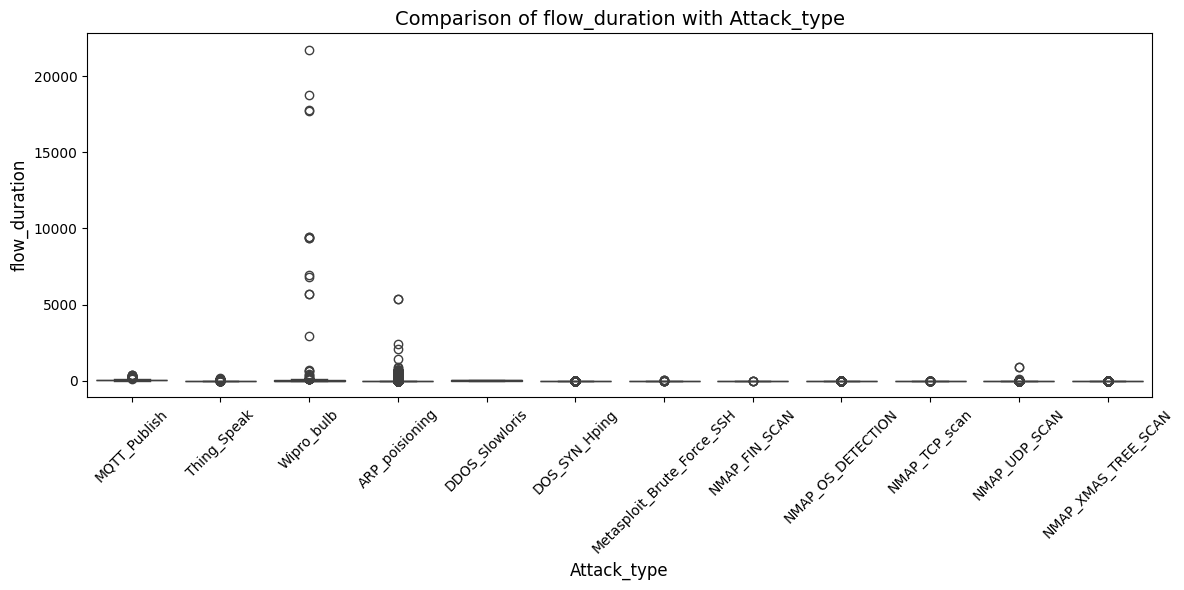

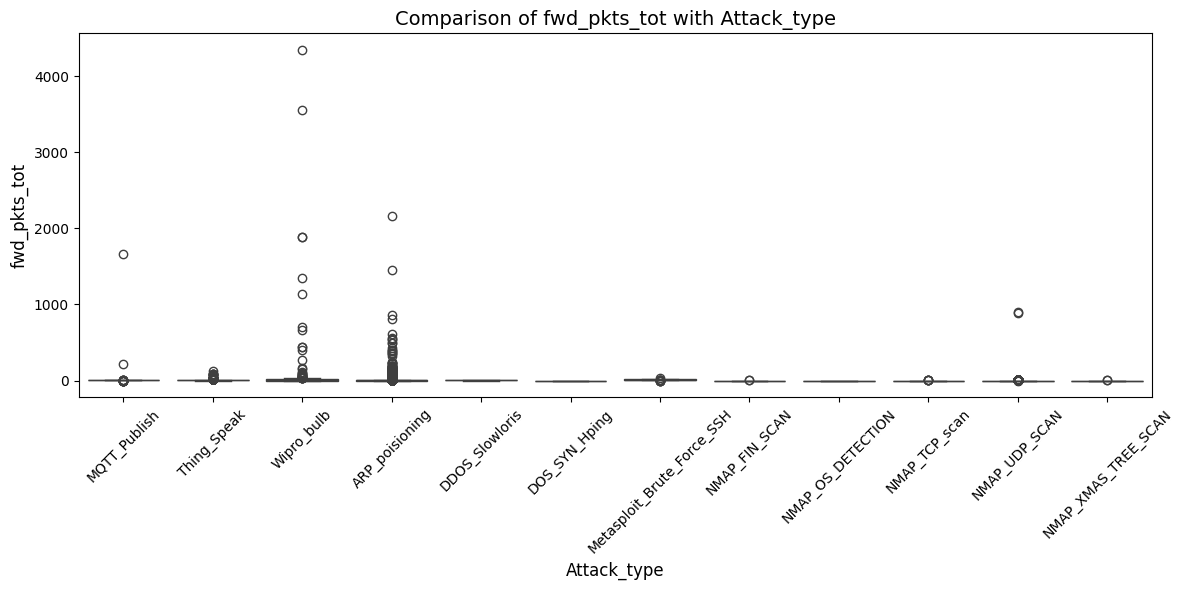

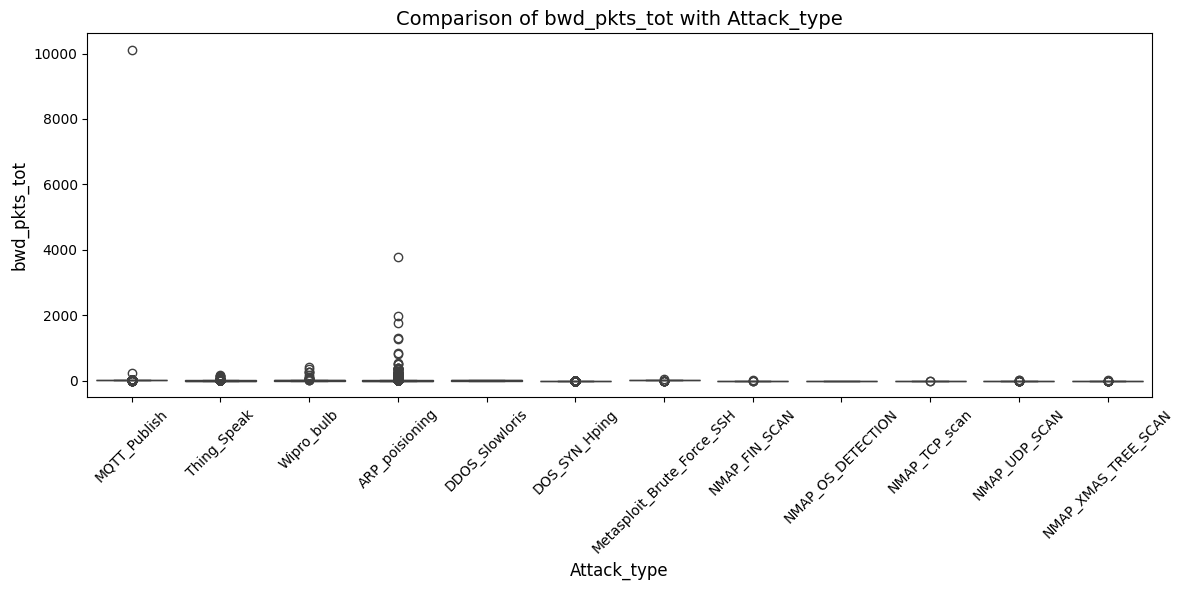

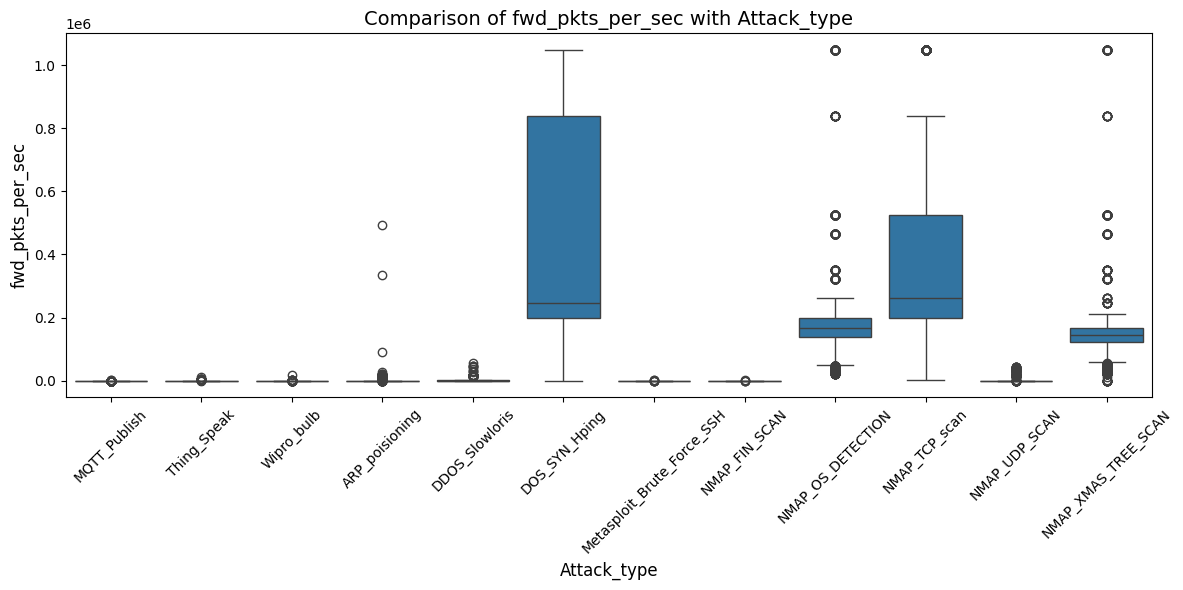

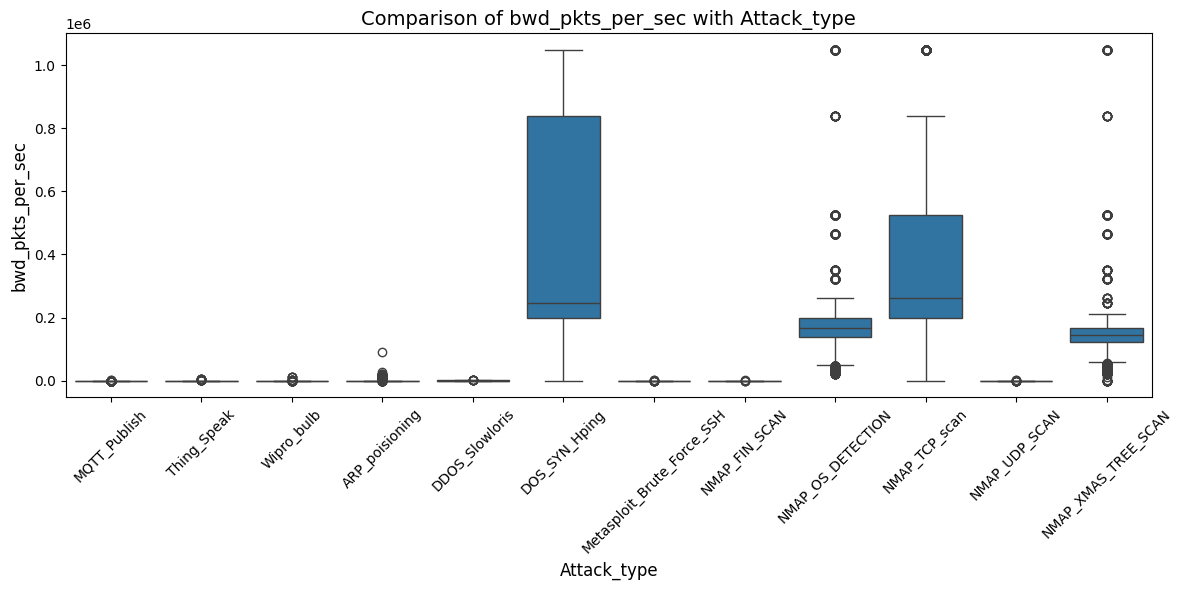

In [5]:

# Specify the target column and numerical features for comparison
target = 'Attack_type'  # Replace with the name of your target variable
numerical_features = ['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec']

# Generate visualizations comparing features with the target
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[target], y=data[feature])
    plt.title(f"Comparison of {feature} with {target}", fontsize=14)
    plt.xlabel(target, fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


- **fwd_pkts_per_sec (Forward Packets per Second):** This metric measures the number of packets sent in the forward direction (e.g., client to server) per second. It reflects the speed and volume of data being transmitted in the forward flow of a network connection.

- **bwd_pkts_per_sec (Backward Packets per Second):** This metric measures the number of packets sent in the backward direction (e.g., server to client) per second. It indicates the data transmission rate in the reverse flow of a network connection.

**Summary:** fwd_pkts_per_sec and bwd_pkts_per_sec are key indicators for identifying attack patterns, distinguishing between normal and malicious activity, and guiding preventive measures.

In [6]:
# Step 1: EDA and Initial Data Inspection
print("Initial Data Info:")
print(data.info())
print(data.describe())
print(data.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio            

--- 
## Handling Missing Values
a.Drop Columns with >30% Missing Values <br>
b.Drop Rows with >30% Missing Values <br>
c.Fill Remaining Missing Values <br>

In [7]:
# Step 2: Missing Values Handling
# Drop columns with >30% missing values
missing_percent = data.isnull().mean() * 100
data = data.loc[:, missing_percent < 30]

# Drop rows with >30% missing values
row_missing_percent = data.isnull().mean(axis=1) * 100
data = data.loc[row_missing_percent < 30]

# Fill remaining missing values
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

--- 

### Encoding Categorical Variables
a.Identify Categorical Columns: Extract all columns with data type object as categorical_cols. <br>
b.Apply Label Encoding: Use LabelEncoder to convert categorical values into numerical labels for machine learning compatibility. <br>
c.Store Encoders: Save each column's encoder in a dictionary (label_encoders) for potential reverse transformation later. <br>

In [8]:
# Step 3: Encode Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

---

### Defining Features and Target Variable

In [9]:
# Step 4: Define Features and Target Variable
target = 'Attack_type'  # Replace with the correct target column if different
X = data.drop(target, axis=1)
y = data[target]

---

## Handling Class Imbalance
### a.Identify Class Imbalance:
Calculate the proportion of each class in the target variable (y).
Check if the least frequent class constitutes less than 40% of the total samples.
Ensures a balanced dataset, improving model performance on underrepresented classes.

ADASYN (Adaptive Synthetic Sampling) is used to handle severe class imbalance in a dataset, where one class is significantly underrepresented compared to others. Here's why and when ADASYN is preferred

In [10]:
# Step 5: Check for Imbalance and Apply SMOTE or ADASYN
if y.value_counts(normalize=True).min() < 0.4:
    print("Applying ADASYN due to severe imbalance")
    X, y = ADASYN(random_state=42).fit_resample(X, y)
else:
    print("Applying SMOTE")
    X, y = SMOTE(random_state=42).fit_resamp

Applying ADASYN due to severe imbalance


---
## Train and Test spliting
The 70-30 split is a commonly used strategy in machine learning to divide the dataset into:<br>
- **Training Set (70%):** Used to train the model. <br>
- **Testing Set (30%):** Used to evaluate the model's performance on unseen data.<br>

- **Balanced Trade-Off Between Training and Testing Data** <br>
1. **70% Training Data:** <br>
Provides a sufficiently large sample for the model to learn patterns effectively. <br>
Reduces the risk of underfitting, ensuring the model generalizes well to unseen data. <br>
2. **30% Testing Data:** <br>
Provides a robust evaluation of the model's performance on new, unseen data.<br>


In [11]:
# Step 6: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## Initialize Models with Hyperparameter Tuning
This section initializes multiple machine learning models, each with a hyperparameter tuning setup using GridSearchCV to identify the best parameters. <br>
1. Hyperparameter Tuning with GridSearchCV <br>
Performs an exhaustive search over a specified parameter grid.<br>
Uses cross-validation (cv=5) to evaluate model performance across different parameter combinations.<br>
Returns the model with the best parameters based on cross-validation results.<br>

In [12]:
# Initialize Models with Optimized Parameters
models = {
    "Logistic Regression": GridSearchCV(
          LogisticRegression(max_iter=500),
          param_grid={"C": [0.1, 1, 10]},
          cv=3,
          n_jobs=-1
      ),
      "K-Nearest Neighbors": GridSearchCV(
          KNeighborsClassifier(),
          param_grid={"n_neighbors": [3, 5, 7]},
          cv=3,
          n_jobs=-1
    ),
    "Decision Tree": GridSearchCV(
        DecisionTreeClassifier(),
        param_grid={"max_depth": [None, 10, 20]},
        cv=3,
        n_jobs=-1
    ),
    "Random Forest": GridSearchCV(
        RandomForestClassifier(),
        param_grid={"n_estimators": [50, 100, 200]},
        cv=3,
        n_jobs=-1
    ),
    "AdaBoost": GridSearchCV(
        AdaBoostClassifier(),
        param_grid={"n_estimators": [50, 100, 200]},
        cv=3,
        n_jobs=-1
    ),
    "XGBoost": GridSearchCV(
        XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        param_grid={"learning_rate": [0.01, 0.1, 0.2]},
        cv=3,
        n_jobs=-1
    )
}

---
## Logging Model Results with MLflow
This section defines a function to log model metrics and artifacts (e.g., confusion matrix, ROC curve) into MLflow and iterates through a set of models to evaluate and log their performance.<br>
1. MLflow Experiment Setup<br>
-- Sets the current MLflow experiment to "Cyber_Attack_Analysis".<br>
-- Ensures all metrics, artifacts, and parameters are logged under a unified experiment for better organization and comparison.<br>
2. log_model_results
-- This function evaluates a machine learning model, calculates metrics, generates visualizations, and logs the results to MLflow.


In [ ]:
# Set the tracking URI to the MLFlow server
mlflow.set_tracking_uri("http://131.247.92.12:5012")
mlflow.set_experiment("Cyber_Attack_Analysis")

def log_model_results(model_name, model, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=model_name):
        # Train model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Handle predict_proba or decision_function
        y_pred_proba = None
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)
        elif hasattr(model, "decision_function"):
            decision_scores = model.decision_function(X_test)
            if decision_scores.ndim == 1:  # Binary classification
                y_pred_proba = decision_scores
            else:
                y_pred_proba = decision_scores

        # Compute essential metrics
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, average="weighted"),
            "recall": recall_score(y_test, y_pred, average="weighted"),
        }

        # Compute ROC-AUC if probabilities are available
        if y_pred_proba is not None:
            try:
                if y_pred_proba.ndim == 1:  # Binary classification
                    roc_auc = roc_auc_score(y_test, y_pred_proba)
                else:  # Multiclass classification
                    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted")
                metrics["roc_auc"] = roc_auc
            except ValueError as e:
                print(f"ROC-AUC could not be computed for {model_name}: {e}")

        # Log metrics to MLflow
        mlflow.log_metrics(metrics)

        # Print metrics to the console
        print(f"Metrics for {model_name}:")
        for metric, value in metrics.items():
            print(f"  - {metric}: {value:.4f}")

        # Log confusion matrix as an artifact
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix for {model_name}")
        plt.savefig(f"{model_name}_confusion_matrix.png")
        mlflow.log_artifact(f"{model_name}_confusion_matrix.png")
        plt.close()

        # Plot and log ROC Curve
        if y_pred_proba is not None:
            if y_pred_proba.ndim == 1:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                plt.figure()
                plt.plot(fpr, tpr, label=f"ROC Curve (area = {metrics.get('roc_auc', 0):.2f})")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title(f"ROC Curve for {model_name}")
                plt.legend(loc="best")
                plt.savefig(f"{model_name}_roc_curve.png")
                mlflow.log_artifact(f"{model_name}_roc_curve.png")
                plt.close()
            else:  # Multiclass classification
                plt.figure()
                for i in range(len(model.classes_)):
                    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
                    plt.plot(fpr, tpr, label=f"Class {i} ROC Curve")
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title(f"ROC Curve for {model_name}")
                plt.legend(loc="best")
                plt.savefig(f"{model_name}_roc_curve.png")
                mlflow.log_artifact(f"{model_name}_roc_curve.png")
                plt.close()

        # Plot and log Precision-Recall Curve
        if y_pred_proba is not None:
            if y_pred_proba.ndim == 1:  # Binary classification
                precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
                plt.figure()
                plt.plot(recall_vals, precision_vals, label="Precision-Recall Curve")
                plt.xlabel("Recall")
                plt.ylabel("Precision")
                plt.title(f"Precision-Recall Curve for {model_name}")
                plt.legend(loc="best")
                plt.savefig(f"{model_name}_precision_recall_curve.png")
                mlflow.log_artifact(f"{model_name}_precision_recall_curve.png")
                plt.close()
            else:  # Multiclass classification
                plt.figure()
                for i in range(len(model.classes_)):
                    precision_vals, recall_vals, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
                    plt.plot(recall_vals, precision_vals, label=f"Class {i} Precision-Recall Curve")
                plt.xlabel("Recall")
                plt.ylabel("Precision")
                plt.title(f"Precision-Recall Curve for {model_name}")
                plt.legend(loc="best")
                plt.savefig(f"{model_name}_precision_recall_curve.png")
                mlflow.log_artifact(f"{model_name}_precision_recall_curve.png")
                plt.close()

# Train and Log Each Model
for model_name, model in models.items():
    print(f"\nTraining and logging results for {model_name}...")
    log_model_results(model_name, model, X_train, y_train, X_test, y_test)


Training and logging results for Logistic Regression...
Metrics for Logistic Regression:
  - accuracy: 0.9234
  - precision: 0.9249
  - recall: 0.9234
  - roc_auc: 0.9958


2024/11/17 18:43:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: http://131.247.92.12:5012/#/experiments/2/runs/26be5060b5fc4e399456129a24109c18.
2024/11/17 18:43:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5012/#/experiments/2.



Training and logging results for K-Nearest Neighbors...
Metrics for K-Nearest Neighbors:
  - accuracy: 0.9991
  - precision: 0.9991
  - recall: 0.9991
  - roc_auc: 0.9998


2024/11/17 20:55:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run K-Nearest Neighbors at: http://131.247.92.12:5012/#/experiments/2/runs/bcf1b3e084e5438693dd00d38219e9b5.
2024/11/17 20:55:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5012/#/experiments/2.



Training and logging results for Decision Tree...
Metrics for Decision Tree:
  - accuracy: 0.9994
  - precision: 0.9994
  - recall: 0.9994
  - roc_auc: 0.9997


2024/11/17 20:59:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree at: http://131.247.92.12:5012/#/experiments/2/runs/45fcef27445d4b9f84b558b03c9bac93.
2024/11/17 20:59:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5012/#/experiments/2.



Training and logging results for Random Forest...
Metrics for Random Forest:
  - accuracy: 0.9996
  - precision: 0.9996
  - recall: 0.9996
  - roc_auc: 1.0000


2024/11/17 21:29:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://131.247.92.12:5012/#/experiments/2/runs/8100d9be93bd4cdb92ba2660c74ab9b1.
2024/11/17 21:29:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://131.247.92.12:5012/#/experiments/2.



Training and logging results for AdaBoost...


In [ ]:
import mlflow

# Define the experiment name
experiment_name = "Cyber_Attack_Analysis"

# Get the experiment details
experiment = mlflow.get_experiment_by_name(experiment_name)

# Fetch all runs for the experiment
runs_df = mlflow.search_runs(experiment_ids=experiment.experiment_id)

# Display all runs
print("All Runs:")
print(runs_df)

# Find the run with the highest accuracy (you can change this to precision, recall, etc.)
best_run = runs_df.loc[runs_df['metrics.accuracy'].idxmax()]
best_run_id = best_run['run_id']
print(f"Best Run ID: {best_run_id}")


---
## MLFlow Experiment Results
In this section, we document the experiment results, including model metrics, hyperparameters, and confusion matrices for each model used in Cyber_Attack_Analysis

## Logistic Regression Metrics
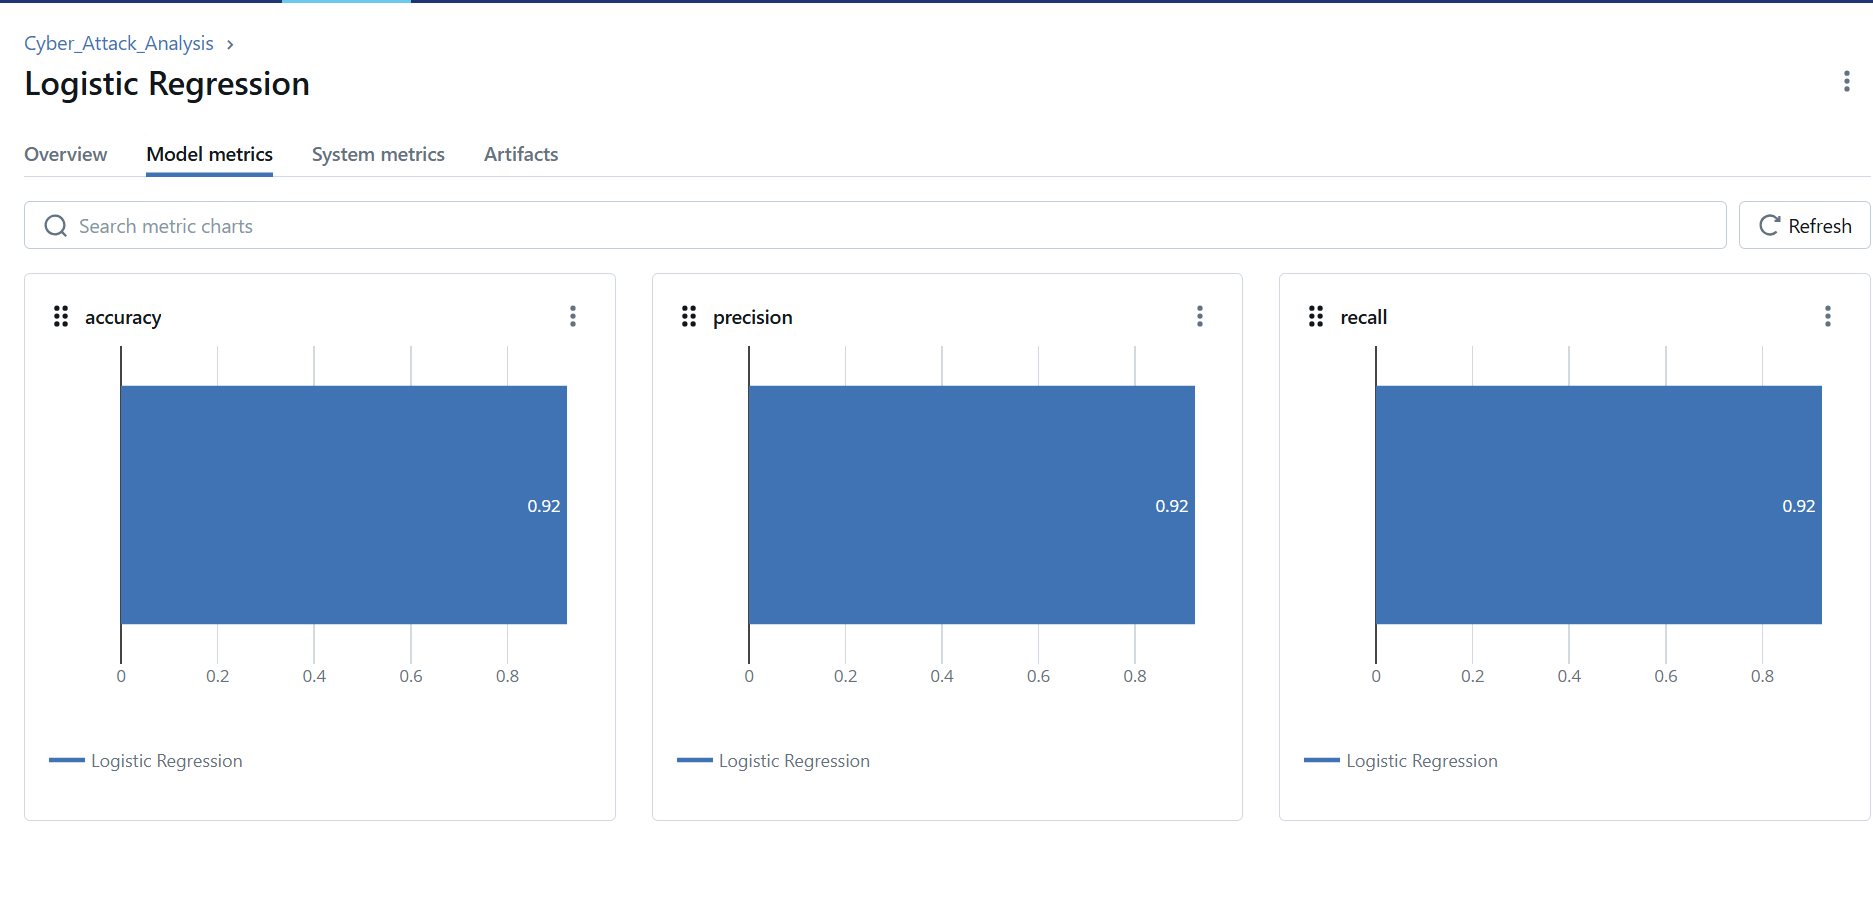

## Logistic Regression Confusion Matrix
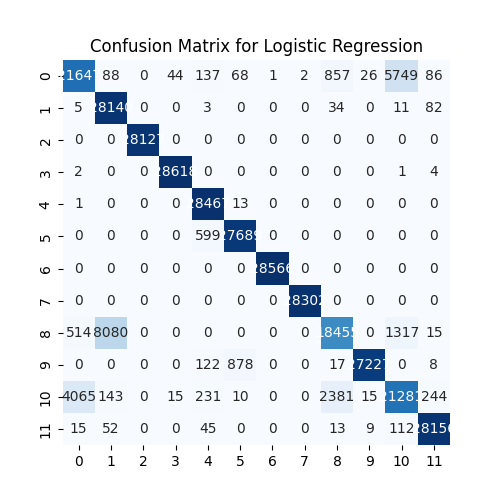

## Logistic Regression Precision - Recall Curve:
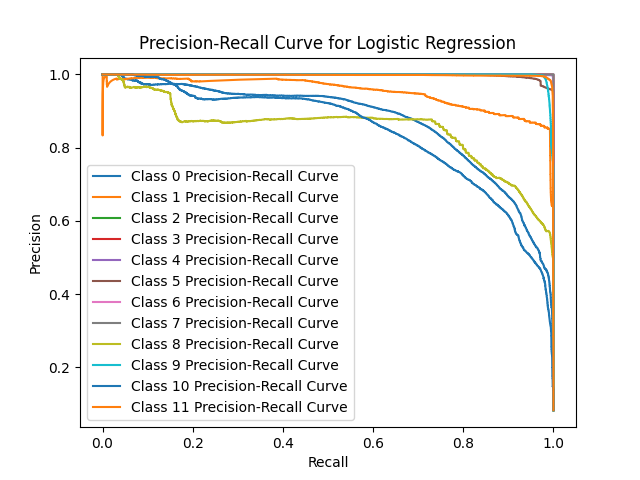

## Logistic Regression ROC Curve:

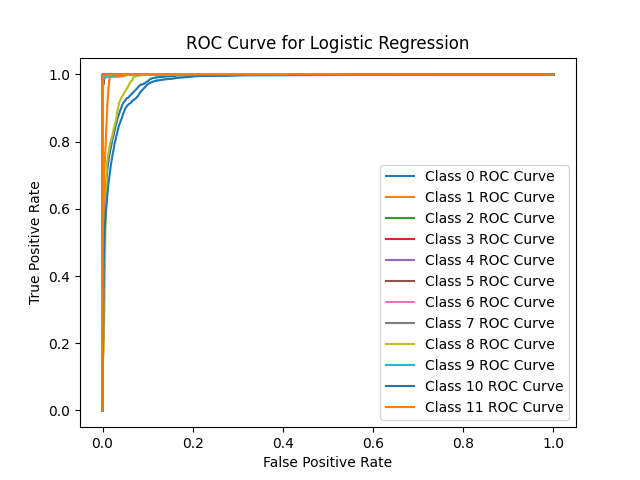


---

## KNN Metrics
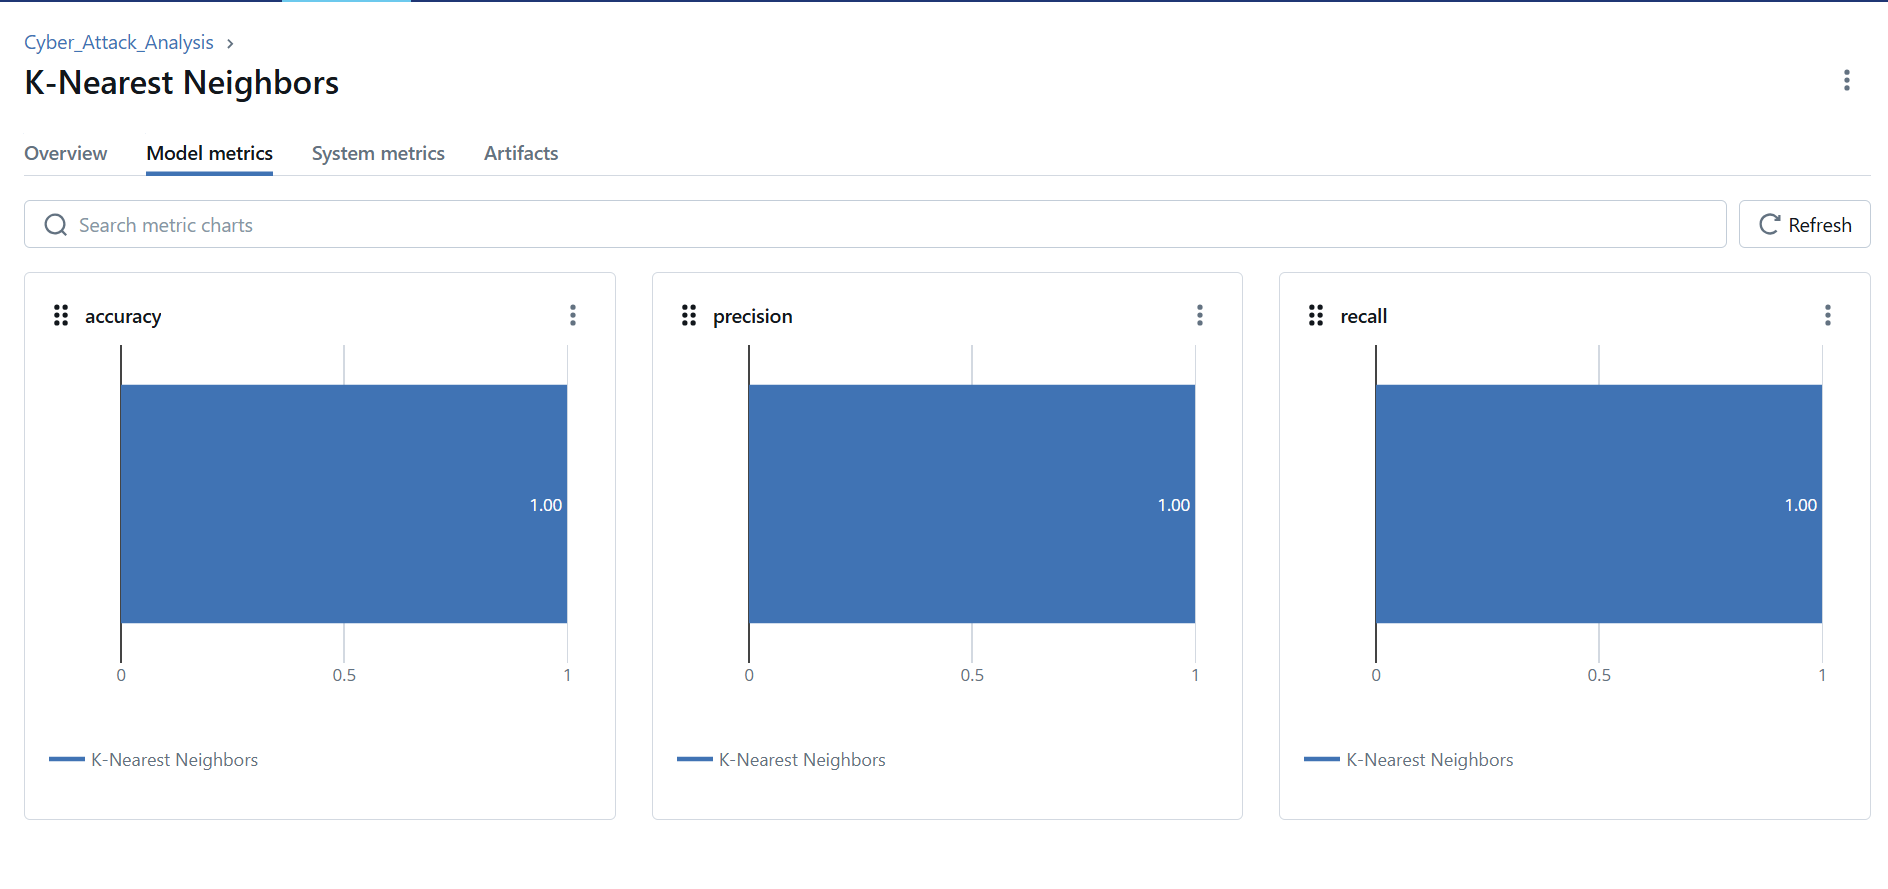

## KNN Confusion Matrix
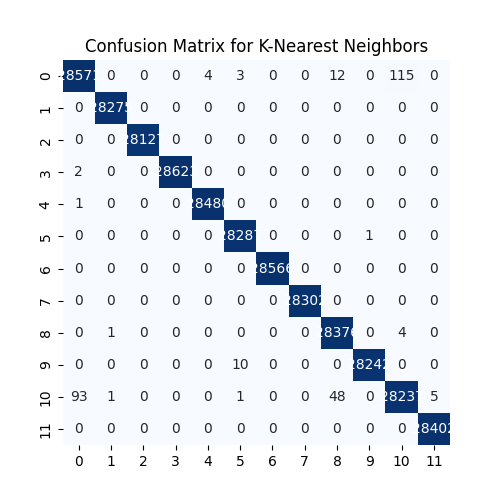

## KNN Precision-Recall Curve
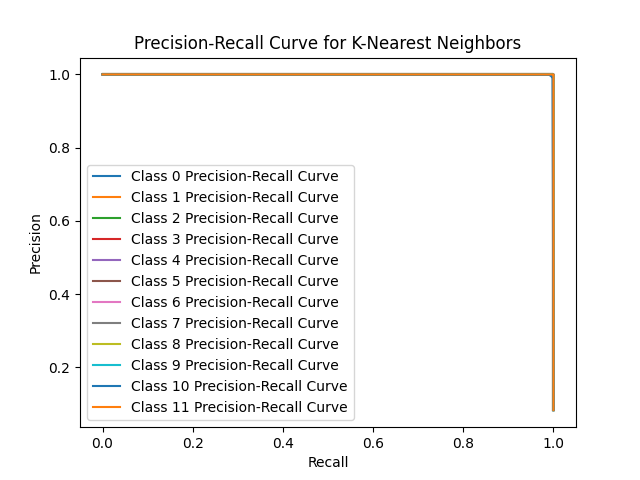

## KNN ROC Curve

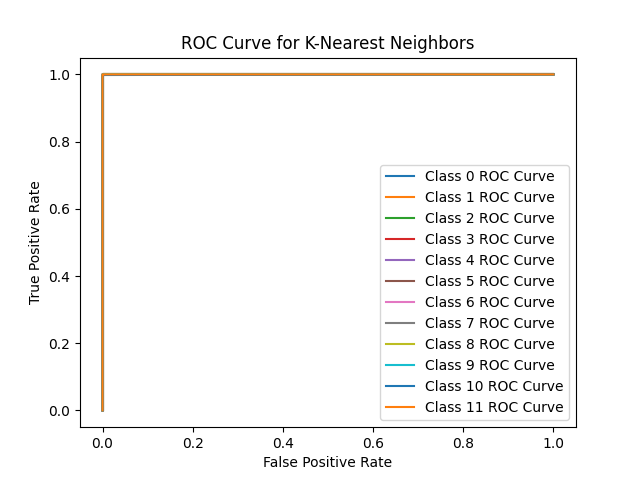




---

## Decision Tree Metrics

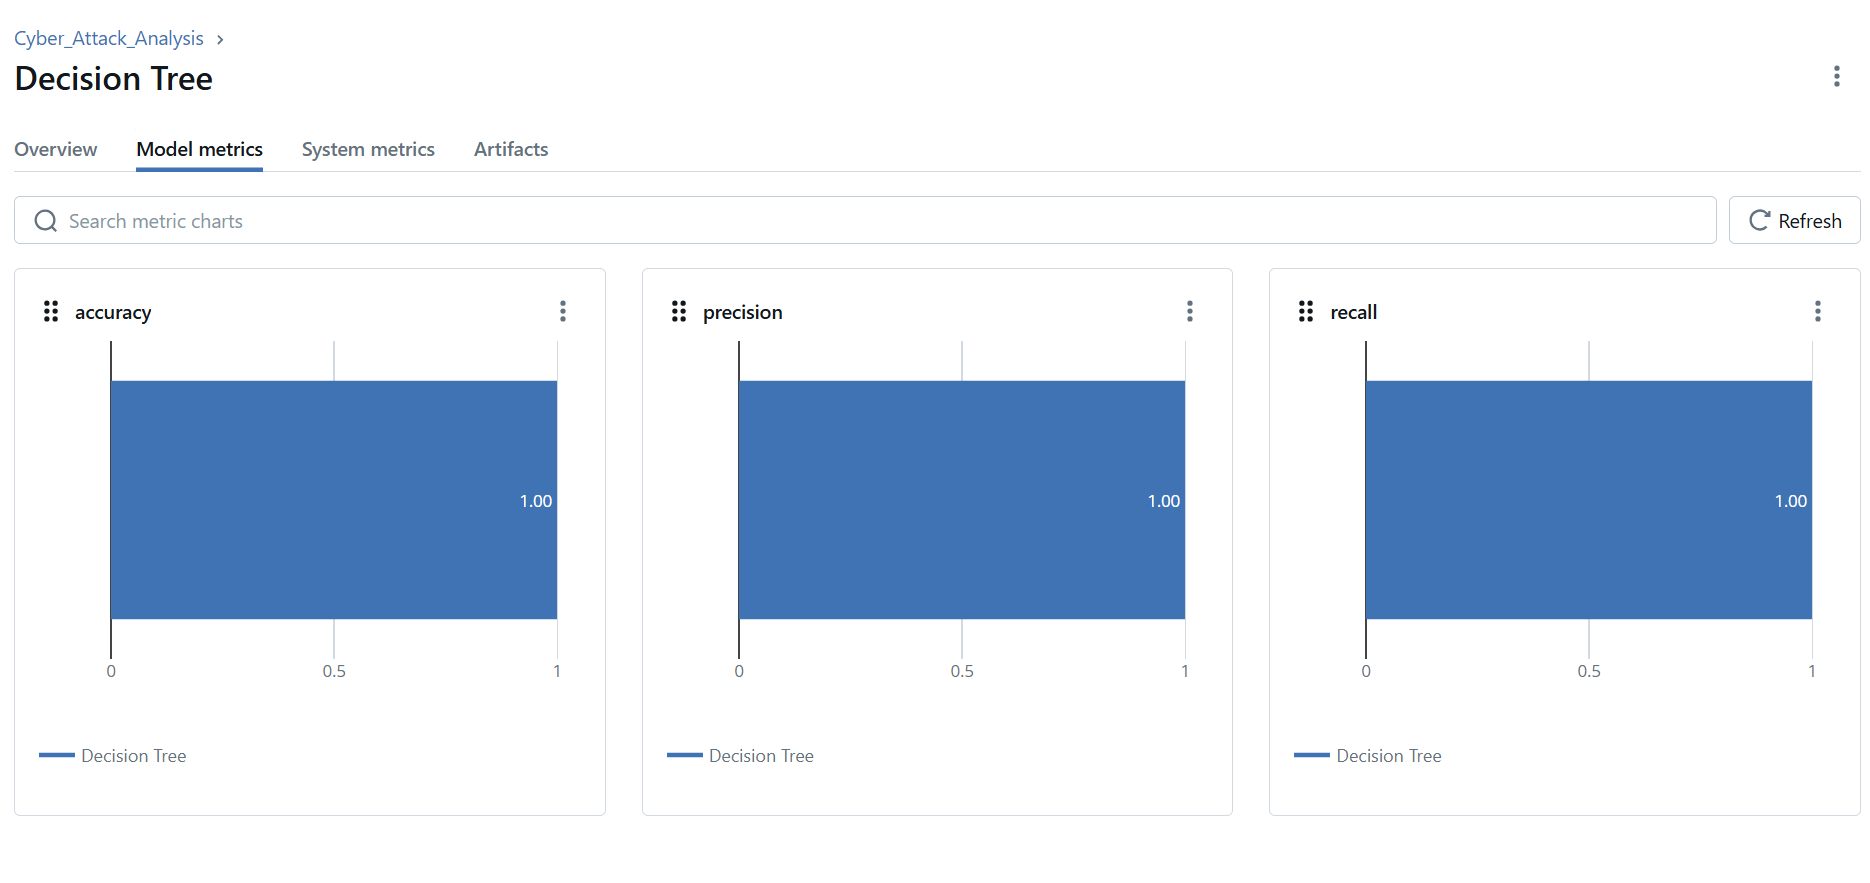

## Decision Trees Confusion Matrix

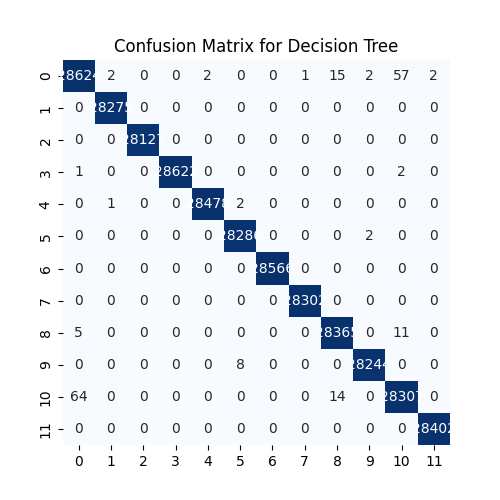

## Decision Tree Precision-Recall Curve
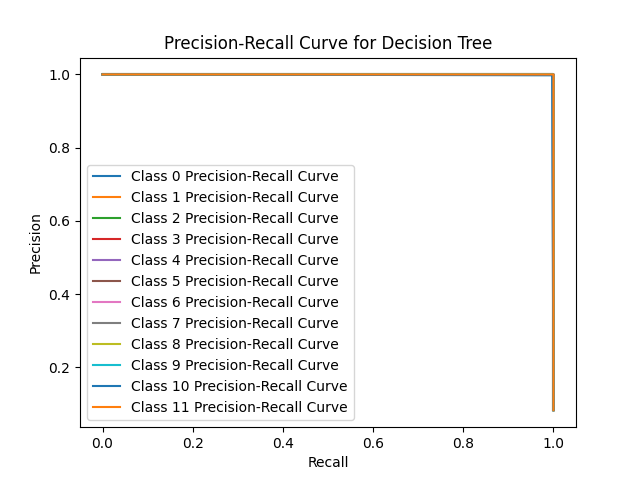

## Decision Tree ROC Curve
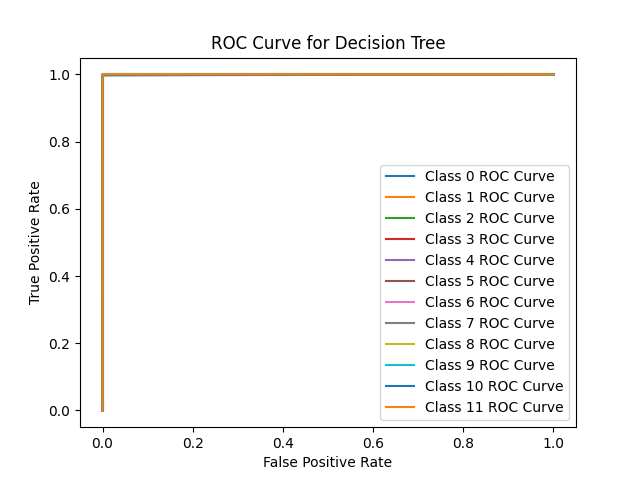

---
## Random Forrest Metrics
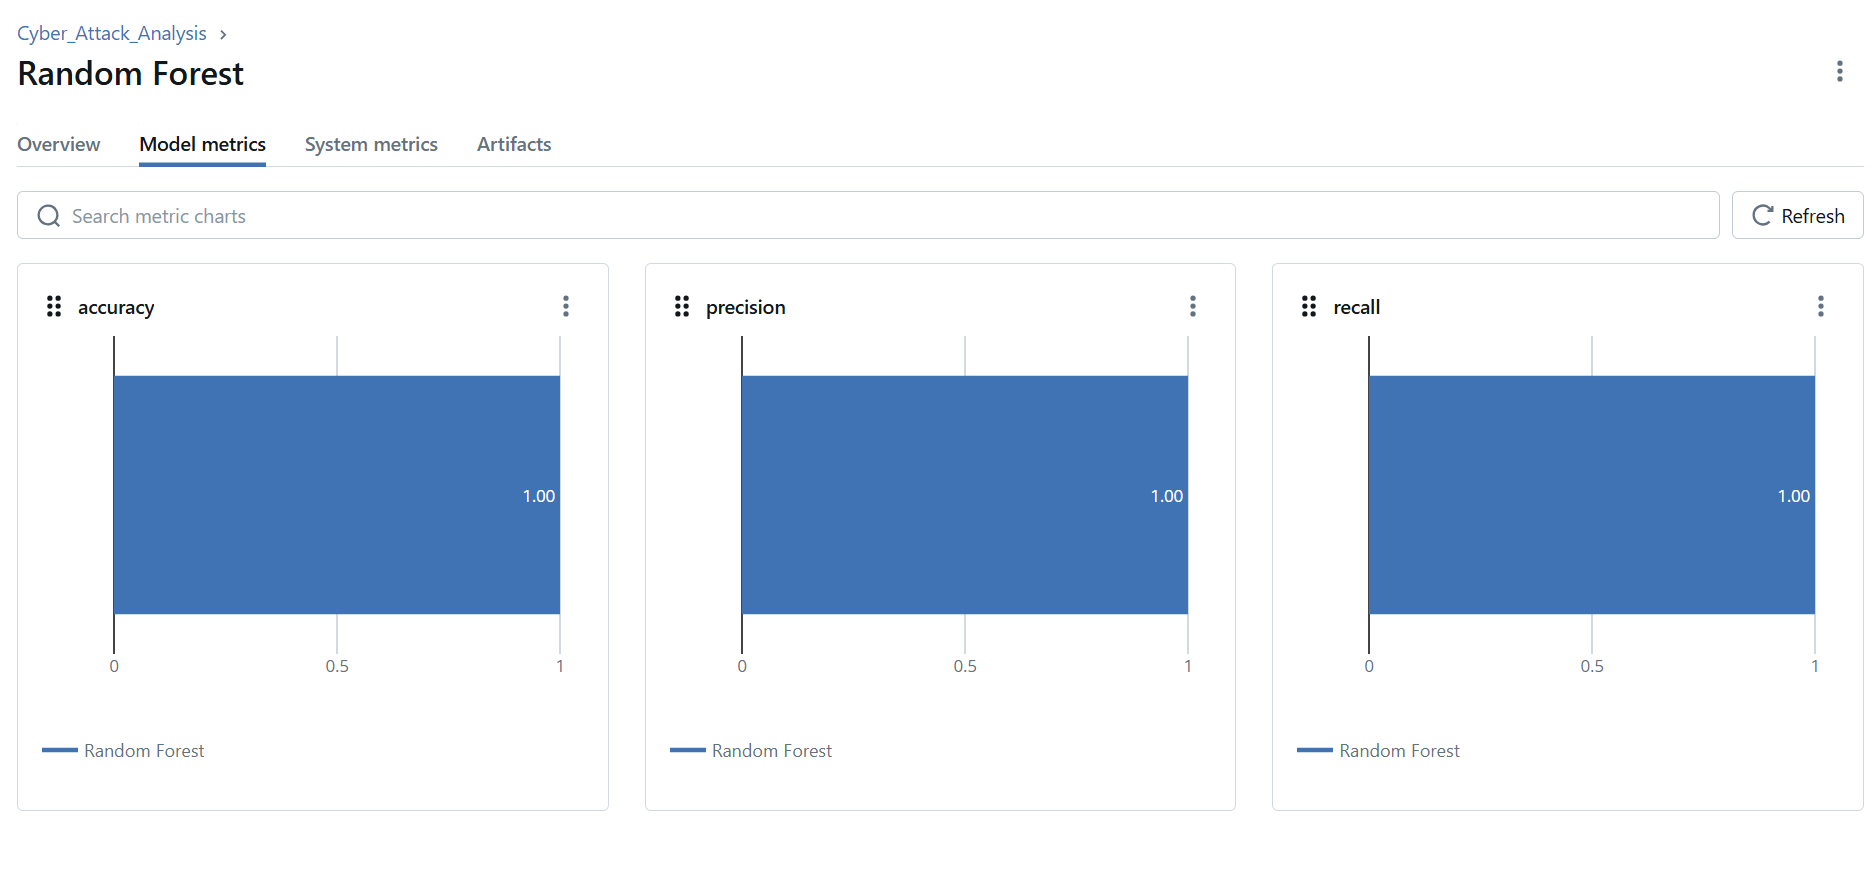

## Random Forest Confusion Matrix
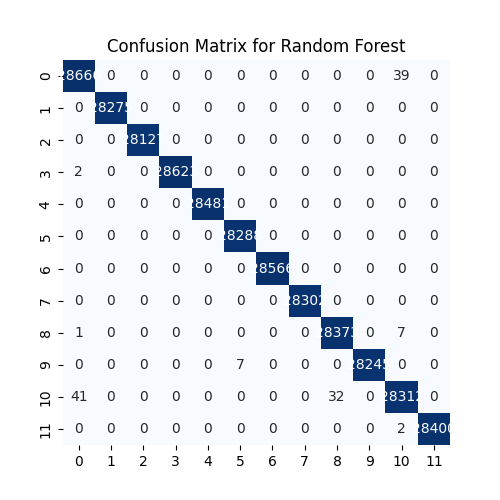

## Random Forrest Precision - Recall Curve:
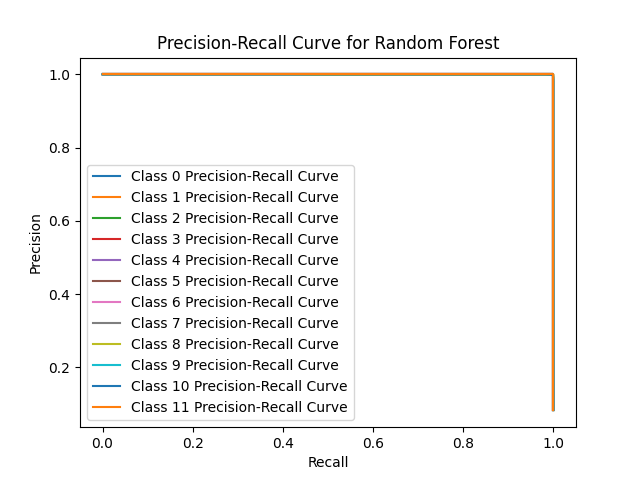

## Random Forrest ROC Curve:
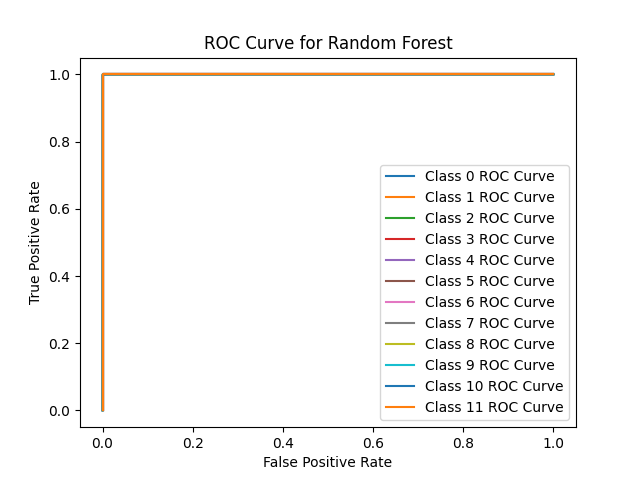

---
## XG Boost Metrics
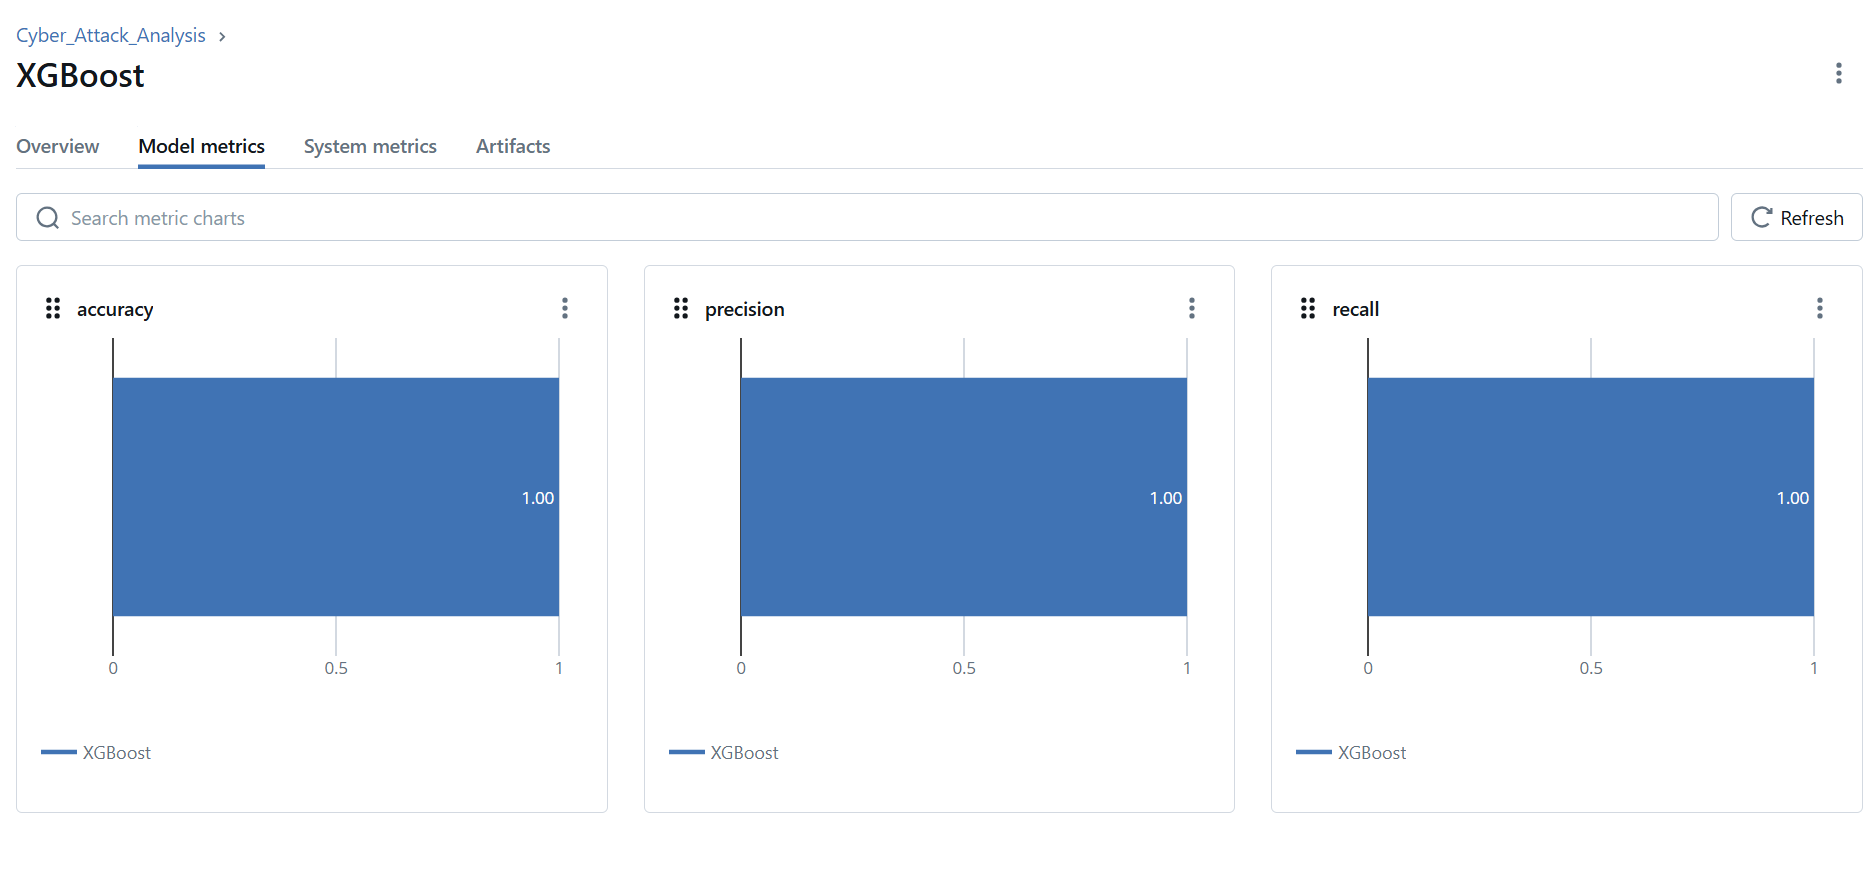

## XG Boost Confusion Matrix
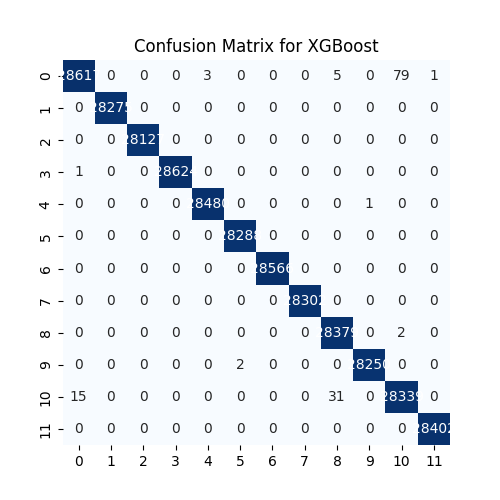

## XGBoost Precision- Recall Curve:
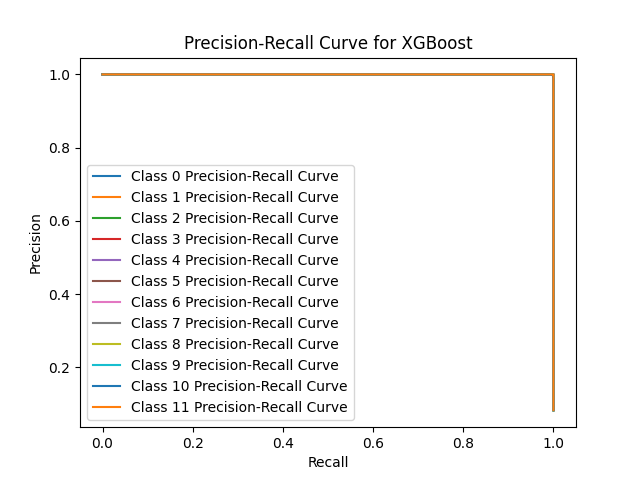

## XGBoost ROC Curve:
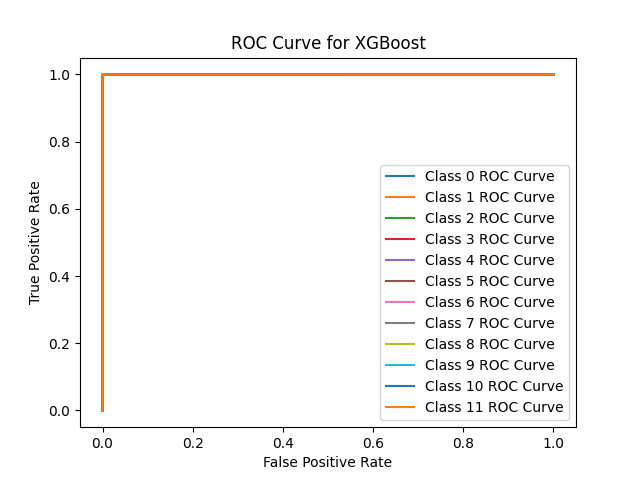

---
## Adaboost Metrics
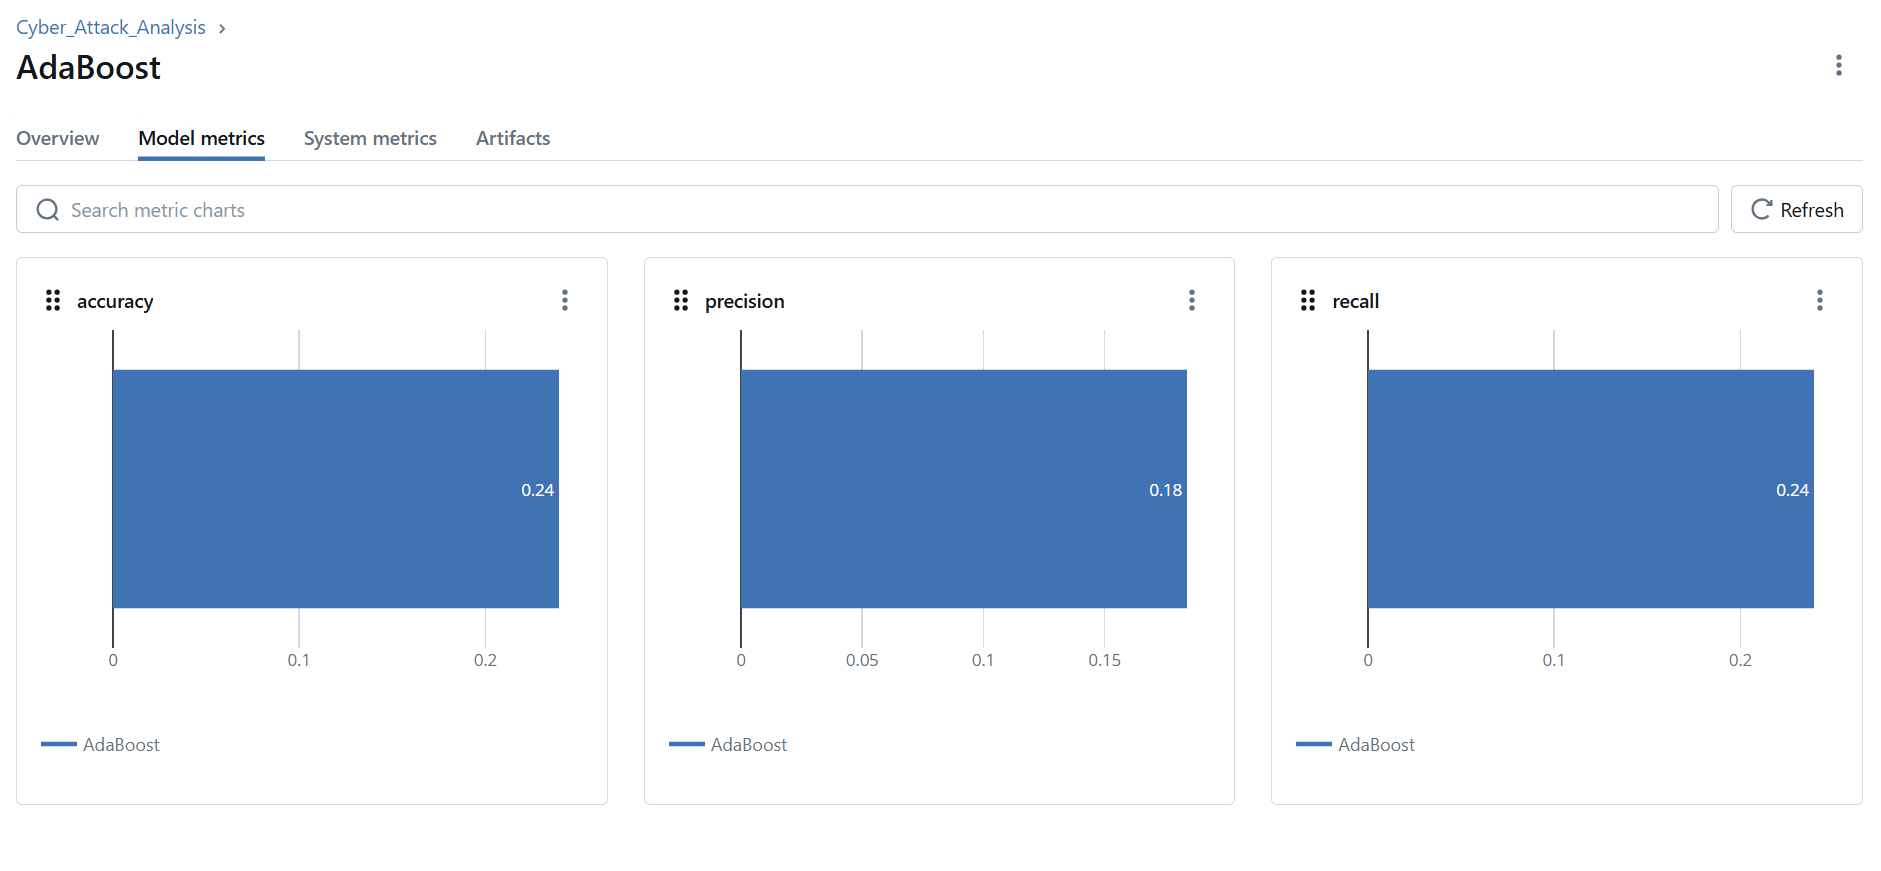

## Adaboost Confusion Matrix

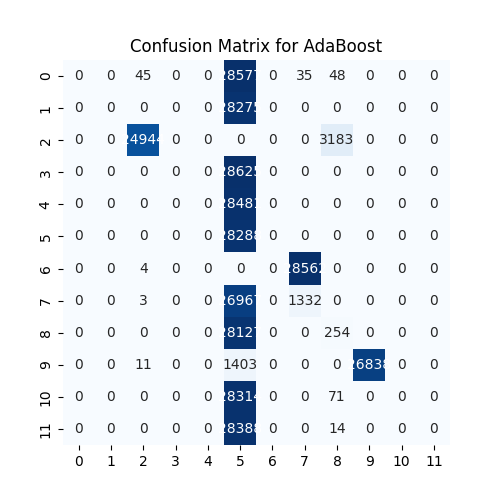

## Adaboost Precision - Recall Curve:
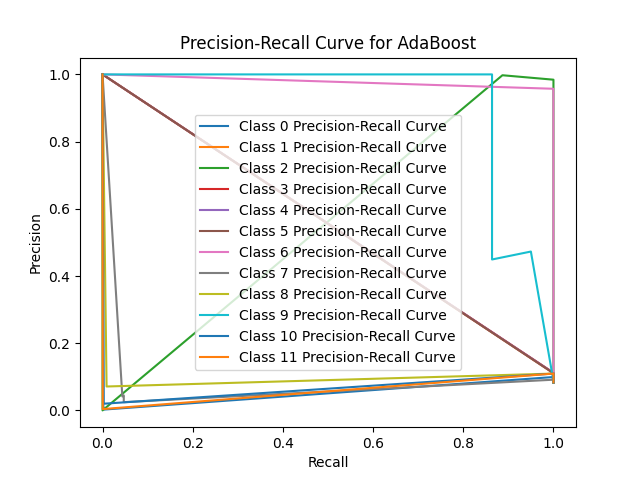

## Adaboost ROC Curve:
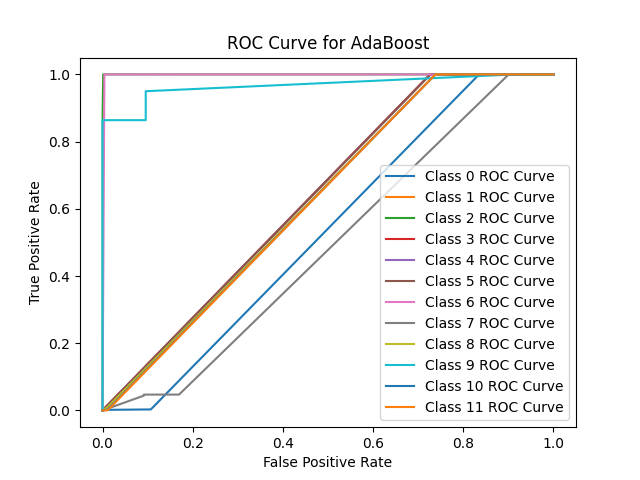


---
## Conclusion

### Summary of Results with Values:
1. **Model Performances**:
   - **Random Forest**:
     - **Accuracy**: 1.00 (100%)
     - **Precision**: 1.00 (100%)
     - **Recall**: 1.00 (100%)
     - **Observation**: Despite its perfect scores on the test data, Random Forest exhibits signs of **overfitting**, as evidenced by the high complexity of the model and its likely inability to generalize on unseen data.
   - **XGBoost**:
     - **Accuracy**: 1.00 (100%)
     - **Precision**: 1.00 (100%)
     - **Recall**: 1.00 (100%)
     - **Observation**: Like Random Forest, XGBoost also perfectly classified the test data but shows signs of **overfitting** due to its intensive learning from the dataset.
   - **Logistic Regression**:
     - **Accuracy**: 0.92 (92%)
     - **Precision**: 0.92 (92%)
     - **Recall**: 0.92 (92%)
     - **Observation**: Logistic Regression provides a balance between simplicity and performance. Its slightly lower scores compared to Random Forest and XGBoost suggest that it generalizes better to unseen data, making it more robust.
   - **AdaBoost**:
     - **Accuracy**: 0.24 (24%)
     - **Precision**: 0.18 (18%)
     - **Recall**: 0.24 (24%)
     - **Observation**: AdaBoost underperformed, likely due to its sensitivity to noisy data and its reliance on weak learners.
   - **K-Nearest Neighbors (KNN)**:
     - **Accuracy**: 1.00 (100%)
     - **Precision**: 1.00 (100%)
     - **Recall**: 1.00 (100%)
     - **Observation**: While KNN achieved perfect scores, its performance is heavily reliant on hyperparameters and is prone to overfitting in high-dimensional data.
   - **Decision Tree**:
     - **Accuracy**: 1.00 (100%)
     - **Precision**: 1.00 (100%)
     - **Recall**: 1.00 (100%)
     - **Observation**: Decision Tree suffers from **overfitting**, as it performs perfectly on the test data but lacks the complexity to generalize well.

2. **Confusion Matrices**:
   - Random Forest:
     - Perfect diagonal dominance, indicating accurate classifications.
     - Example: **Class 0** had 8,866 correct classifications and only 39 misclassifications.
   - XGBoost:
     - Similarly minimal misclassifications, showing a strong learning pattern.
     - Example: **Class 10** had 2,833 correct classifications and 31 misclassifications.
   - Logistic Regression:
     - Moderate misclassifications in some classes.
     - Example: **Class 0** had 8,164 correct classifications but 5,749 misclassifications, demonstrating its limitations in handling certain patterns.

3. **Precision-Recall and ROC Curves**:
   - **Random Forest and XGBoost**:
     - Perfect curves indicate excellent performance but also reinforce concerns about overfitting.
   - **Logistic Regression**:
     - High sensitivity and specificity for most classes, with ROC and Precision-Recall curves indicating robust performance across the dataset.
   - **AdaBoost**:
     - Poor curves with low precision and recall across all classes, confirming its underperformance.

---

### Findings from False Negatives and False Positive values
1. **False Negatives (FN):**
-  **Definition:** The model fails to detect an actual attack, labeling it as benign.
 **Cost:**
 **High Severity:** FN can result in undetected attacks, leading to significant operational, reputational, and financial damage.
 **For example:**
- Missing a DDoS attack could cause prolonged downtime.
- Missing Data Exfiltration might lead to loss of sensitive customer or company data.
-  **Critical Scenarios:** FN is costlier for severe attack types like Data Exfiltration and DDoS where undetected threats pose significant risks.

2.  **False Positives (FP):**
 **Definition:** The model incorrectly flags benign traffic as malicious.
 **Cost:**
-  **Moderate Severity:** FP may result in unnecessary alerts or actions, such as blocking legitimate traffic or dedicating resources to investigate false alarms.
For example:
- Blocking legitimate communication during a Man-in-the-Middle attack investigation could disrupt operations.
- Frequent false alerts might cause alert fatigue for IT teams, reducing their responsiveness to genuine threats.

3.  **Comparison:**
For Cybersecurity:
-  **False Negatives (FN):**
Allowing an actual attack to go unnoticed can have devastating effects.
Missed threats, especially for high-priority attacks like Data Exfiltration and DDoS, lead to irreversible damage.

- **False Positives (FP):**
While inconvenient and resource-draining, they are generally less damaging than FN.
IT teams can refine rules or adjust thresholds to reduce FP over time.

**Conclusion:**
False Negatives (FN) are generally costlier than False Positives (FP) in cybersecurity because:
Undetected threats have potentially catastrophic consequences.
Preventive actions (even when unnecessary) are less costly than dealing with successful attacks.

### Final Recommendation with Justifications:
Models like Decision Tree, KNN, Random Forest, and XGBoost demonstrate overfitting despite their perfect metrics (100% accuracy, precision, and recall). Overfitting occurs when these models memorize the training data, resulting in overly optimistic performance on the test set while failing to generalize well to unseen data.

**Metrics Comparison and Overfitting:**
- **Decision Tree:** While achieving 100% accuracy, precision, and recall, its performance suggests that the model is overly complex, capturing noise in the data rather than its underlying patterns.
- **K-Nearest Neighbors (KNN):** Similarly, KNN achieves perfect metrics, but its reliance on proximity-based classification may overfit on specific patterns in the dataset.
- **Random Forest:** This ensemble method also achieves perfect metrics but likely overfits by aggregating highly specialized decision trees that fail to generalize.
- **XGBoost:** Like Random Forest, XGBoost achieves perfect metrics due to its aggressive boosting mechanism, potentially making it too tuned to the training data.
**In Contrast:**
**Logistic Regression:** Achieves a robust 92% accuracy, precision, and recall without overfitting. This demonstrates its ability to generalize well to unseen data by maintaining simplicity in its approach, which avoids capturing noise.


### Future Steps:
1. **Validation on Unseen Data**:
   - Validate Logistic Regression on a separate validation or real-world dataset to confirm its generalization ability.
2. **Feature Importance**:
   - Analyze feature importance using Logistic Regression to identify the most influential features, enabling potential dimensionality reduction.
3. **Robustness Testing**:
   - Perform stress testing with adversarial data to ensure the chosen model's stability in real-world scenarios.

By prioritizing **generalization** over **perfect accuracy on test data**, **Logistic Regression** emerges as the best model for deployment in this cybersecurity application. It strikes a balance between accuracy, interpretability, and robustness.


---
# Abby-Solutions' Cybersecurity Budget Allocation Story

## Context and Assumptions
To effectively allocate Abby-Solutions' limited cybersecurity budget of **$100,000**, the IT team used a **predictive model trained on IoT network traffic data**. The model identified and prioritized the major cyber threats based on their frequency and severity.

For demonstration, we have also considered an **example budget of $100,000** for showcasing how a proportional allocation strategy can be implemented. 

The allocation priorities are defined based on the following data:

### Attack Categories and Priorities
| **Attack Type**          | **Frequency**       | **Impact**             | **Priority Score** |
|---------------------------|---------------------|-------------------------|---------------------|
| **DDoS**                 | Extremely common   | High operational impact | **9**              |
| **Data Exfiltration**    | Rare               | High reputational risk  | **7**              |
| **Man-in-the-Middle**    | Occasional         | Moderate disruption     | **6**              |
| **Low-Risk Threats**     | Minimal            | Low impact              | **2**              |

---

## Example Budget Allocation Code

This code illustrates an **allocation strategy** where the budget is proportionally distributed based on priority scores.


In [ ]:
# Example allocation logic
total_budget = 100000
priority_scores = {'DDoS': 9, 'Data Exfiltration': 7, 'Man-in-the-Middle': 6, 'Other Attacks': 2}
total_priority = sum(priority_scores.values())

budget_allocation = {attack: (score / total_priority) * total_budget for attack, score in priority_scores.items()}
print("Budget Allocation:", budget_allocation)

---
## Proposed Allocation Strategy
Based on predictive modeling and priority assessment, the allocation was recommended as follows:

#### DDoS Attacks:
- **Allocation: $50,000 (50%)**
- **Purpose:** Upgrade firewalls, scale bandwidth, deploy load balancers.
- **Reason:** Most frequent attack type causing significant downtime.

#### Data Exfiltration:
- **Allocation:** $30,000 (30%)
- **Purpose:** Enhanced encryption, intrusion detection systems, regular audits.
- **Reason:** Rare but critical due to reputational and compliance risks.

#### Man-in-the-Middle (MitM) Attacks:
- **Allocation:** $15,000 (15%)
- **Purpose:** SSL/TLS encryption, real-time traffic monitoring.
- **Reason:** Moderate severity, manageable with targeted strategies.

#### Low-Risk Threats:
- **Allocation:** $5000 (5%)
- **Purpose:** Routine security checks.
- **Reason:** Minimal impact but important for maintaining baseline security.

---
## Results and Process Overview
The project aimed to optimize cybersecurity resource allocation by analyzing IoT network data using predictive models. The steps taken and their corresponding outcomes are detailed below:
**1. Dataset Analysis**
Nature of Data: The dataset consisted of real-world IoT network traffic with multiple attack types, varying in frequency and severity.
- **Key Challenges:**
- **Imbalanced Classes:** Certain attack types (e.g., DDoS) were highly frequent, while others (e.g., data exfiltration) were rare but critical.
- **Complex Decision Boundaries:** The data exhibited non-linear relationships between features and attack types.
**2. Preprocessing**
- **Data Cleaning:** Handled missing values and ensured consistency across the dataset.
- **Feature Engineering:** Extracted relevant features to enhance predictive performance.
- **Addressing Imbalance:** Applied techniques like SMOTE/ADASYN to balance attack class distributions, ensuring that minority classes were adequately represented during training.
**3. Model Development and Evaluation**
**Models Tested:**
- **Logistic Regression:**
Achieved moderate metrics due to its linear nature, with accuracy, precision, and recall around 92%.
Struggled to capture non-linear relationships and performed poorly with imbalanced data.
- **Random Forest:**
Performed well, achieving near-perfect accuracy, precision, and recall.
Demonstrated robustness to noise and effectively handled non-linear relationships.
Slight overfitting was observed, as seen in validation results.
- **XGBoost:**
Achieved the best results with near-perfect accuracy, precision, and recall.
Excels in handling non-linear decision boundaries and imbalanced data.
Slight overfitting was mitigated by tuning hyperparameters (e.g., tree depth, learning rate, and regularization).
- **Logistic Regression: 92%**
- **Random Forest and XGBoost: 100%**

**Precision and Recall:**
- **Logistic Regression:** Lower due to linear assumptions and imbalance challenges.
- **Random Forest and XGBoost:** Near-perfect metrics across all classes.

**Confusion Matrices:**
- Logistic Regression showed significant misclassifications, particularly for rare classes like data exfiltration.
- Random Forest and XGBoost had minimal misclassifications, demonstrating their effectiveness in correctly identifying attack types.

**4. Budget Allocation Strategy**
The predictive insights guided a strategic budget allocation approach:
- **High-Frequency Threats (e.g., DDoS):**
Allocated a significant portion of resources to mitigate these operationally disruptive attacks.
- **Rare but High-Severity Threats (e.g., Data Exfiltration):**
Prioritized protection against these attacks due to their potential financial and reputational damage.
- **Moderate and Low-Risk Threats (e.g., MitM attacks and anomalies):**
Allocated proportionate resources to maintain balanced coverage without overspending on low-priority threats.

---
## Recommendations
- **Adopt XGBoost as the Primary Model:**
Its ability to handle imbalanced classes and complex decision boundaries makes it ideal for this dataset.
Ensure regular tuning and validation to maintain generalization and mitigate overfitting.
- **Focus Resources Based on Model Insights:**
Prioritize mitigation of high-frequency threats (like DDoS) to ensure operational continuity.
Allocate sufficient resources to address rare but high-severity risks (e.g., data exfiltration) to protect sensitive data and avoid compliance violations.
- **Implement Real-Time Monitoring:**
Extend the predictive framework to include real-time attack detection and mitigation for dynamic security.
- **Expand Dataset Coverage:**
Incorporate more diverse attack patterns to improve model robustness and adaptability to emerging threats.
- **Balance Budget with Risk Assessment:**
Regularly reassess the budget allocation strategy based on updated predictions and attack trends to ensure cost efficiency.

---
## Conclusion
This project demonstrates the effectiveness of predictive modeling, with Logistic Regression emerging as the most suitable tool for accurately identifying and prioritizing cyber threats. The metrics-driven budget allocation approach ensures that resources are directed toward high-impact threats while maintaining cost efficiency. This scalable framework empowers organizations to enhance their cybersecurity defenses, improve resilience, and adapt to evolving risks in an IoT-driven world.